In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from scipy import sparse
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
import joblib

1\. Import Data

In [120]:
data = pd.read_csv('theDataset/Youtube03-LMFAO.csv')

data = data.drop(['COMMENT_ID', 'AUTHOR', 'DATE'], axis=1)
# CONTENT / CLASS

x=data.drop(['CLASS'], axis=1)
y= data.drop(['CONTENT'], axis=1)

print(x)

                                               CONTENT
0    <a href="http://www.youtube.com/watch?v=KQ6zr6...
1                                     wierd but funny﻿
2    Hey guys, I&#39;m a human.<br /><br /><br />Bu...
3         Party Rock....lol...who wants to shuffle!!!﻿
4                                          Party rock﻿
..                                                 ...
433                   Like this comment for no reason﻿
434                                    love this song﻿
435  this song is awesome. these guys are the best....
436   HOW MANY THUMBS UP FOR LOUIS SAVING THE DAY!?!?﻿
437                                           NICE :3﻿

[438 rows x 1 columns]


2. PreProceessing

In [172]:
y.value_counts()

1    236
0    202
Name: CLASS, dtype: int64

In [122]:
x['CONTENT'] = x['CONTENT'].str.lower()
print(x)

                                               CONTENT
0    <a href="http://www.youtube.com/watch?v=kq6zr6...
1                                     wierd but funny﻿
2    hey guys, i&#39;m a human.<br /><br /><br />bu...
3         party rock....lol...who wants to shuffle!!!﻿
4                                          party rock﻿
..                                                 ...
433                   like this comment for no reason﻿
434                                    love this song﻿
435  this song is awesome. these guys are the best....
436   how many thumbs up for louis saving the day!?!?﻿
437                                           nice :3﻿

[438 rows x 1 columns]


In [123]:
x['CONTENT'] = x['CONTENT'].str.replace(r'.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),])+',' ')

C:\Users\Abdel Alim\AppData\Local\Temp\ipykernel_15848\401413228.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  x['CONTENT'] = x['CONTENT'].str.replace(r'.com/(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),])+',' ')


In [128]:
x.loc[[0]]

,CONTENT
0,"<a href=""http://www.youtube "">2:19</a> best part﻿"


2. Stop Words 

In [129]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Abdel
[nltk_data]     Alim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [130]:
stop_words = set(stopwords.words('english'))

In [83]:
print(stop_words)

{"don't", 'didn', 'be', 'll', 'y', 'me', "didn't", 'had', 'an', 'or', "you're", 'we', 'so', 'mustn', 'few', "needn't", "wasn't", 'very', 'when', 'such', 'hadn', 'while', 'my', 'i', 'he', 'itself', 'herself', "weren't", 'down', 'where', 'is', "should've", 'were', 'now', 've', 'after', 'all', 'our', 'does', 'again', 'to', 'myself', 'them', "mightn't", 'haven', 'during', "mustn't", 'yourselves', 'until', 'the', 'what', 'has', 'o', 'by', 'same', 'if', 'just', 'of', 'can', 'she', 'they', 'shouldn', 'his', 'hasn', 'did', 'some', 'won', 'as', 'you', 'doing', 'mightn', 'in', 'over', "couldn't", 'being', 'ourselves', "she's", 'hers', 'himself', 'her', 'above', 'don', 'with', "haven't", 'nor', 'because', 'more', 'shan', 'under', 'there', "hadn't", "shan't", 'whom', "that'll", 'each', 'but', 'do', 'against', 'why', 'here', "shouldn't", 'd', 'wouldn', 'wasn', 'its', 'am', 'not', "you'll", "isn't", 'too', 'this', 'about', "hasn't", 'before', 'have', 'any', 'their', 'doesn', 'needn', "you'd", 'at', 

In [134]:
def remove_stop(x):
    return " ".join([word for word in str(x).split() if word not in stop_words])
x['CONTENT'] = x['CONTENT'].apply(lambda x : remove_stop(x))

In [135]:
x['CONTENT'] = x['CONTENT'].str.replace(r'[^\w\s]',' ')

C:\Users\Abdel Alim\AppData\Local\Temp\ipykernel_15848\1734438751.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  x['CONTENT'] = x['CONTENT'].str.replace(r'[^\w\s]',' ')


In [136]:
def remove_multiple_spaces(x):
    return " ".join([word for word in str(x).split()])
x['CONTENT'] = x['CONTENT'].apply(lambda x : remove_multiple_spaces(x))

                                       CONTENT
52  see br href http adf ly http adf ly 1hmvtx


In [137]:
x

,CONTENT
0,href http www youtube 2 19 best part
1,wierd funny
2,hey guys 39 human br br br 39 want human want ...
3,party rock lol wants shuffle
4,party rock
...,...
433,like comment reason
434,love song
435,song awesome guys best love video hilarious lo...
436,many thumbs louis saving day


In [138]:
x1 = x['CONTENT']
y=data['CLASS']

In [139]:
# convert sting to numbers 
vectorizer = CountVectorizer( )
featuers = vectorizer.fit_transform(x1)
print(featuers)

  (0, 355)	1
  (0, 356)	1
  (0, 807)	1
  (0, 820)	1
  (0, 10)	1
  (0, 98)	1
  (0, 527)	1
  (1, 793)	1
  (1, 286)	1
  (2, 355)	1
  (2, 340)	1
  (2, 323)	1
  (2, 23)	2
  (2, 358)	2
  (2, 113)	9
  (2, 777)	2
  (2, 629)	1
  (2, 283)	2
  (2, 299)	1
  (2, 58)	1
  (2, 479)	1
  (2, 702)	2
  (2, 219)	1
  (2, 670)	1
  (2, 168)	1
  :	:
  (435, 447)	1
  (435, 659)	1
  (435, 433)	1
  (435, 441)	1
  (435, 729)	1
  (435, 80)	1
  (435, 559)	1
  (435, 765)	1
  (435, 248)	1
  (435, 497)	1
  (435, 585)	1
  (435, 342)	1
  (435, 298)	1
  (435, 453)	1
  (435, 546)	1
  (435, 786)	1
  (435, 736)	1
  (435, 198)	1
  (435, 506)	1
  (436, 729)	1
  (436, 450)	1
  (436, 184)	1
  (436, 440)	1
  (436, 615)	1
  (437, 499)	1


In [140]:
modle = KNeighborsClassifier(n_neighbors=3)
X_train, X_test,y_train, y_test = train_test_split(featuers,y ,
                                   test_size=0.25, 
                                   shuffle=True)



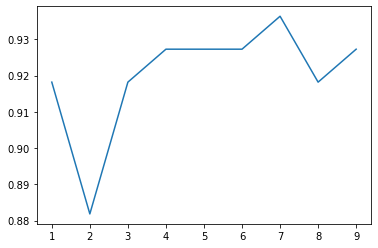

In [141]:
a = []
b =  range(1,10)
for i in b:
    modle = KNeighborsClassifier(n_neighbors=i)
    modle.fit(X_train, y_train) 
    y_predict = modle.predict(X_test)
    
    a.append(accuracy_score(y_predict, y_test)) 
plt.plot(b, a)

In [178]:
a = []
modle = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
iter =10000
maxacurssy = 0.89
bestX_train, bestX_test,besty_train,besty_test = X_train, X_test,y_train, y_test 
for i in range(iter):
    X_train, X_test,y_train, y_test = train_test_split(featuers,y ,
                                   test_size=0.25,
                                   shuffle=True)
    modle.fit(X_train, y_train)
    accuracy = modle.score(X_test,y_test)
    a.append(accuracy)
    if maxacurssy <accuracy:
        joblib.dump(modle,'nahini.joblib')
        maxacurssy = accuracy
        print(maxacurssy)
        bestX_train, bestX_test,besty_train,besty_test = X_train, X_test,y_train, y_test

0.9
0.9090909090909091
0.9181818181818182
0.9363636363636364
0.9454545454545454
0.9636363636363636
0.9727272727272728
0.9818181818181818


In [167]:
X_train, X_test,y_train, y_test = bestX_train, bestX_test,besty_train,besty_test
modle = KNeighborsClassifier(n_neighbors=6)
modle.fit(X_train, y_train) 
y_predict = modle.predict(X_test)

print(accuracy_score(y_predict, y_test))

1.0


In [19]:
def predictWithKnn(self, x, model, vectorizer):
    
    featuerspre = vectorizer.transform([str(x)])
    y_pred = modle.predict(x)
    return y_pred